In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib
print("🌫🛸")

🌫🛸


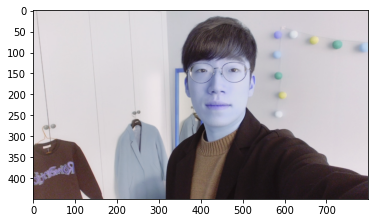

In [2]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image.png'
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
plt.imshow(img_bgr)
plt.show()

얼굴 색에 왜이렇게 푸른빛이 감도는 걸까요? 이것은 opencv의 특징 때문입니다. 오늘 사용하게 될 matplotlib, dlib 등의 이미지 라이브러리는 모두 이미지 채널을 RGB(빨강, 녹색, 파랑) 순으로 사용합니다. 그런데 opencv는 예외적으로 BGR(파랑, 녹색, 빨강)을 사용합니다. 그래서 여러분의 원본 사진에서 붉은색은 푸른색으로, 푸른색은 붉은색으로 바뀌어 출력된 것입니다. 그래서, opencv에서 다룬 이미지를 다른 이미지 라이브러리를 활용하여 출력하려면 아래와 같은 색깔 보정처리를 해주게 됩니다.

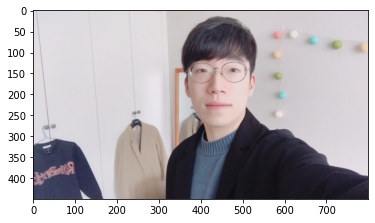

In [3]:
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

SVM은 선형 분류기입니다. 한 이미지를 다차원 공간의 한 벡터라고 보면 여러 이미지는 여러 벡터가 될텐데요. 이 여러 벡터를 잘 구분짓는 방법입니다. 여기서는 얼굴이냐 아니냐를 구분하는 것이 중요하겠죠.

HOG는 이미지에서 색상의 변화량을 나타냄
이미지의 색상만 가지고는 SVM이 큰 힘을 발휘하지 못합니다. 하지만 이미지가 HOG를 통해 벡터로 만들어진다면 SVM이 잘 작동합니다.

그렇다면 얼굴의 위치는 어떻게 찾을 수 있을까요? 바로 sliding window를 사용합니다. sliding window는 작은 영역(window)을 이동해가며 확인하는 방법을 말합니다. 큰 이미지의 작은 영역을 잘라 얼굴이 있는지 확인하고, 다시 작은 영역을 옆으로 옮겨 얼굴이 있는지 확인하는 방식이겠네요. 물론 이렇게 한다면 이미지가 크면 클수록 오래걸리는 단점이 있습니다. 바로 이 지점이 딥러닝이 필요해지는 이유이기도 하지요.